!pip install azure-mgmt-monitor
!pip install azure-identity


# Available Azure OpenAI Metrics

This notebook demonstrates how to query Azure OpenAI metrics using the MonitorManagementClient from the azure-mgmt-monitor package. Below is a comprehensive list of available metrics for Azure OpenAI services.
Reference: https://learn.microsoft.com/en-us/azure/ai-foundry/openai/monitor-openai-reference

## Most Important Metrics for Azure OpenAI

### Core Azure OpenAI Metrics
- **Azure OpenAI Requests** (`AzureOpenAIRequests`) - Number of API calls
- **Active Tokens** (`ActiveTokens`) - Total tokens minus cached tokens  
- **Generated Completion Tokens** (`GeneratedTokens`) - Output tokens from model
- **Processed FineTuned Training Hours** (`FineTunedTrainingHours`) - Training hours for fine-tuned models
- **Processed Inference Tokens** (`TokenTransaction`) - Total input + output tokens
- **Processed Prompt Tokens** (`ProcessedPromptTokens`) - Input tokens to model
- **Provisioned-managed Utilization V2** (`AzureOpenAIProvisionedManagedUtilizationV2`) - PTU utilization %
- **Prompt Token Cache Match Rate** (`AzureOpenAIContextTokensCacheMatchRate`) - Cache hit rate %
- **Time to Response** (`AzureOpenAITimeToResponse`) - Latency for first response
- **Time Between Tokens** (`AzureOpenAINormalizedTBTInMS`) - Token generation rate
- **Time to Last Byte** (`AzureOpenAITTLTInMS`) - Time for complete response
- **Normalized Time to First Byte** (`AzureOpenAINormalizedTTFTInMS`) - Time to first byte
- **Tokens per Second** (`AzureOpenAITokenPerSecond`) - Generation speed

### Content Safety Metrics
- **Blocked Volume** (`RAIRejectedRequests`) - Requests blocked by content filter
- **Harmful Volume Detected** (`RAIHarmfulRequests`) - Harmful content detected
- **Potential Abusive User Count** (`RAIAbusiveUsersCount`) - Users flagged as potentially abusive
- **Safety System Event** (`RAISystemEvent`) - Safety monitoring events
- **Total Volume Sent for Safety Check** (`RAITotalRequests`) - All requests checked

## Complete Metrics List by Category

### Azure OpenAI - HTTP Requests
| Metric | REST API Name | Unit | Description |
|--------|---------------|------|-------------|
| Azure OpenAI AvailabilityRate | `AzureOpenAIAvailabilityRate` | Percent | Service availability percentage |
| Azure OpenAI Requests | `AzureOpenAIRequests` | Count | API call count with dimensions for filtering |

### Azure OpenAI - Latency  
| Metric | REST API Name | Unit | Description |
|--------|---------------|------|-------------|
| Time Between Token | `AzureOpenAINormalizedTBTInMS` | MilliSeconds | Token generation rate for streaming |
| Normalized Time to First Byte | `AzureOpenAINormalizedTTFTInMS` | MilliSeconds | Time to first response byte |
| Time to Response | `AzureOpenAITimeToResponse` | MilliSeconds | Latency for first response |
| Tokens Per Second | `AzureOpenAITokenPerSecond` | Count | Generation speed |
| Time to Last Byte | `AzureOpenAITTLTInMS` | MilliSeconds | Complete response time |

### Azure OpenAI - Usage
| Metric | REST API Name | Unit | Description |
|--------|---------------|------|-------------|
| Active Tokens | `ActiveTokens` | Count | Total tokens minus cached tokens |
| Audio Completion Tokens | `AudioCompletionTokens` | Count | Audio output tokens |
| Audio Prompt Tokens | `AudioPromptTokens` | Count | Audio input tokens |
| Prompt Token Cache Match Rate | `AzureOpenAIContextTokensCacheMatchRate` | Percent | Cache hit percentage |
| Provisioned-managed Utilization V2 | `AzureOpenAIProvisionedManagedUtilizationV2` | Percent | PTU utilization (recommended) |
| Provisioned-managed Utilization | `AzureOpenAIProvisionedManagedUtilization` | Percent | PTU utilization (deprecated) |
| Processed FineTuned Training Hours | `FineTunedTrainingHours` | Count | Fine-tuning training hours |
| Generated Completion Tokens | `GeneratedTokens` | Count | Model output tokens |
| Processed Prompt Tokens | `ProcessedPromptTokens` | Count | Model input tokens |
| Processed Inference Tokens | `TokenTransaction` | Count | Total tokens (input + output) |

### ContentSafety - Risks & Safety
| Metric | REST API Name | Unit | Description |
|--------|---------------|------|-------------|
| Potentially Abusive User Count | `RAIAbusiveUsersCount` | Count | Users flagged as potentially abusive |
| Harmful Volume Detected | `RAIHarmfulRequests` | Count | Harmful content detected |
| Blocked Volume | `RAIRejectedRequests` | Count | Requests blocked by filters |
| Safety System Event | `RAISystemEvent` | Count | Safety monitoring events |
| Total Volume Sent For Safety Check | `RAITotalRequests` | Count | All requests processed by safety |

### Legacy Cognitive Services Metrics (Not Recommended for Azure OpenAI)
⚠️ **Note**: These metrics are legacy and not recommended for Azure OpenAI:
- `TotalCalls`, `SuccessfulCalls`, `ClientErrors`, `ServerErrors`
- `BlockedCalls`, `Latency`, `DataIn`, `DataOut`
- Use the Azure OpenAI specific metrics above instead

## Common Dimensions for Filtering
- **ModelDeploymentName** - Filter by specific model deployment
- **ModelName** - Filter by model (e.g., gpt-4, gpt-35-turbo)
- **ModelVersion** - Filter by model version
- **Region** - Filter by Azure region
- **StatusCode** - Filter by HTTP status codes
- **StreamType** - Filter by streaming vs non-streaming requests
- **ApiName** - Filter by API endpoint
- **OperationName** - Filter by operation type

In [6]:
!az login --tenant 16b3c013-d300-468d-ac64-7eda0820b6d3

[
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "16b3c013-d300-468d-ac64-7eda0820b6d3",
    "id": "6025ba02-1dfd-407f-b358-88f811c7c7aa",
    "isDefault": true,
    "managedByTenants": [
      {
        "tenantId": "2f4a9838-26b7-47ee-be60-ccc1fdec5953"
      },
      {
        "tenantId": "72f988bf-86f1-41af-91ab-2d7cd011db47"
      }
    ],
    "name": "MCAPS-Hybrid-REQ-40165-2022-JakeWang",
    "state": "Enabled",
    "tenantId": "16b3c013-d300-468d-ac64-7eda0820b6d3",
    "user": {
      "name": "jacwang@microsoft.com",
      "type": "user"
    }
  },
  {
    "cloudName": "AzureCloud",
    "homeTenantId": "16b3c013-d300-468d-ac64-7eda0820b6d3",
    "id": "997499f7-6523-407d-ac0c-d9ee154f1df1",
    "isDefault": false,
    "managedByTenants": [
      {
        "tenantId": "72f988bf-86f1-41af-91ab-2d7cd011db47"
      }
    ],
    "name": "MCAPS-Hybrid-REQ-41592-2022-KamalAbburi",
    "state": "Enabled",
    "tenantId": "16b3c013-d300-468d-ac64-7eda0820b6d3",
    "user": {
   

In [8]:
import os
from datetime import datetime, timedelta, timezone
from typing import Dict, Optional

from azure.identity import DefaultAzureCredential
from azure.mgmt.monitor import MonitorManagementClient

credential = DefaultAzureCredential()


def ensure_utc(dt: datetime) -> datetime:
    if dt.tzinfo is None:
        return dt.replace(tzinfo=timezone.utc)
    return dt.astimezone(timezone.utc)


def format_datetime_iso(dt: datetime) -> str:
    dt_utc = ensure_utc(dt)
    return dt_utc.isoformat(timespec="seconds").replace("+00:00", "Z")


def build_timespan(start: datetime, duration: Optional[timedelta] = None, end: Optional[datetime] = None) -> str:
    if end is None and duration is None:
        raise ValueError("Provide either a duration or an end datetime.")
    if end is None:
        end = start + duration
    start_iso = format_datetime_iso(start)
    end_iso = format_datetime_iso(end)
    return f"{start_iso}/{end_iso}"


def timedelta_to_iso8601(delta: timedelta) -> str:
    total_seconds = int(delta.total_seconds())
    days, rem = divmod(total_seconds, 86400)
    hours, rem = divmod(rem, 3600)
    minutes, seconds = divmod(rem, 60)
    parts = ["P"]
    if days:
        parts.append(f"{days}D")
    if hours or minutes or seconds:
        parts.append("T")
        if hours:
            parts.append(f"{hours}H")
        if minutes:
            parts.append(f"{minutes}M")
        if seconds:
            parts.append(f"{seconds}S")
    if len(parts) == 1:
        parts.extend(["T", "0S"])
    return "".join(parts)


def extract_metric_name(metric) -> str:
    name = getattr(metric, "name", None)
    if hasattr(name, "value"):
        return name.value
    return name


def metadata_values_to_dict(metadata_values) -> Dict[str, str]:
    if not metadata_values:
        return {}
    if isinstance(metadata_values, dict):
        return metadata_values
    result: Dict[str, str] = {}
    for item in metadata_values:
        key = getattr(getattr(item, "name", None), "value", getattr(item, "name", None))
        if key:
            result[key] = getattr(item, "value", None)
    return result


def extract_timestamp(data_point):
    raw = getattr(data_point, "time_stamp", getattr(data_point, "timestamp", None))
    if isinstance(raw, datetime):
        return ensure_utc(raw)
    return raw


Ensure your service principal has "Monitor Reader" role on the Azure AI resource.
https://learn.microsoft.com/azure/azure-monitor/essentials/roles-permissions-security


In [9]:
from dotenv import load_dotenv

load_dotenv()

SubscriptionID = os.environ.get("AZURE_SUBSCRIPTION_ID")
ResourceGroupName = os.environ.get("AZURE_RESOURCE_GROUP_NAME")
AOAIResource = os.environ.get("AZURE_AOAI_RESOURCE_NAME")

if not SubscriptionID:
    SubscriptionID = "00000000-0000-0000-0000-000000000000"
    print("Warning: AZURE_SUBSCRIPTION_ID not set. Using placeholder subscription ID for metric queries.")
if not ResourceGroupName or not AOAIResource:
    raise ValueError("Set AZURE_RESOURCE_GROUP_NAME and AZURE_AOAI_RESOURCE_NAME environment variables.")

monitor_client = MonitorManagementClient(credential, SubscriptionID)


In [10]:
resource_id = (
    f"/subscriptions/{SubscriptionID}/resourceGroups/{ResourceGroupName}/"
    f"providers/Microsoft.CognitiveServices/accounts/{AOAIResource}"
)
print(f"Resource ID: {resource_id}")


Resource ID: /subscriptions/6025ba02-1dfd-407f-b358-88f811c7c7aa/resourceGroups/sc1-oai/providers/Microsoft.CognitiveServices/accounts/eu2-oai


In [37]:
client = monitor_client
start_time = datetime(2025, 8, 10)
end_time = datetime(2025, 8, 18)
duration = timedelta(days=7)

timespan = build_timespan(start_time, end=end_time)
daily_interval = timedelta_to_iso8601(timedelta(days=1))
hourly_interval = timedelta_to_iso8601(timedelta(hours=1))

response = client.metrics.list(
    resource_id,
    metricnames="AzureOpenAIRequests",
    timespan=timespan,
    interval=daily_interval,
    filter="modeldeploymentname eq '*'",
)

metrics_data = response.value


In [38]:
for metric in metrics_data or []:
    metric_name = extract_metric_name(metric)
    print(metric_name)
    for time_series_element in getattr(metric, "timeseries", []) or []:
        metadata = metadata_values_to_dict(time_series_element.metadatavalues)
        print(metadata)
        for metric_value in getattr(time_series_element, "data", []) or []:
            payload = metric_value.as_dict() if hasattr(metric_value, "as_dict") else metric_value.__dict__
            print(payload)

AzureOpenAIRequests
{'modeldeploymentname': 'o4-mini'}
{'time_stamp': '2025-08-10T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-11T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-12T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-13T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-14T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-15T00:00:00.000Z', 'total': 54.0}
{'time_stamp': '2025-08-16T00:00:00.000Z', 'total': 52.0}
{'time_stamp': '2025-08-17T00:00:00.000Z', 'total': 0.0}
{'modeldeploymentname': 'o3'}
{'time_stamp': '2025-08-10T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-11T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-12T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-13T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-14T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-15T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-16T00:00:00.000Z', 'total': 10.0}
{'time_stamp': '2025-08-17T00:00:00.000Z', 'total': 39.0}

In [39]:
# Flatten metrics data to a single array of data points with all fields
import json

flat_metrics = []


def convert(obj):
    if isinstance(obj, datetime):
        return format_datetime_iso(obj)
    if hasattr(obj, "isoformat"):
        return obj.isoformat()
    return obj


for metric in metrics_data or []:
    metric_name = extract_metric_name(metric)
    for time_series_element in getattr(metric, "timeseries", []) or []:
        metadata = metadata_values_to_dict(time_series_element.metadatavalues)
        for value in getattr(time_series_element, "data", []) or []:
            flat_metrics.append(
                {
                    "timestamp": convert(extract_timestamp(value)),
                    "average": getattr(value, "average", None),
                    "minimum": getattr(value, "minimum", None),
                    "maximum": getattr(value, "maximum", None),
                    "total": getattr(value, "total", None),
                    "count": getattr(value, "count", None),
                    "metric_name": metric_name,
                    "metadata": metadata,
                }
            )

json_output = json.dumps(flat_metrics, indent=2, default=convert)


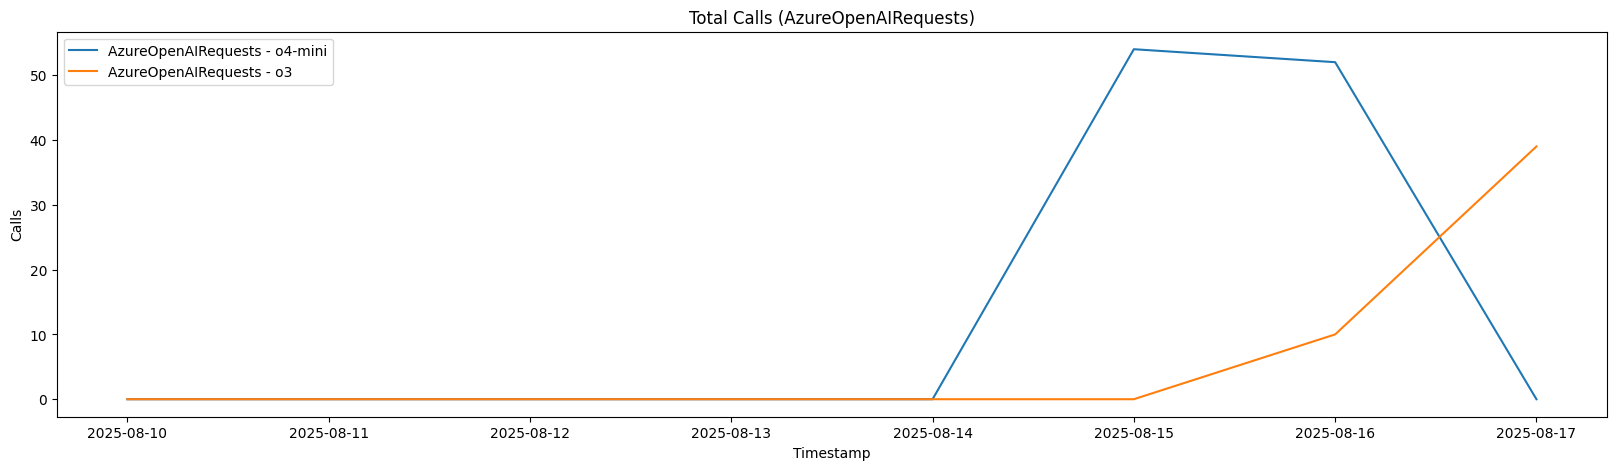

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))

for metric in metrics_data or []:
    metric_name = extract_metric_name(metric)
    for time_series_element in getattr(metric, "timeseries", []) or []:
        points = list(getattr(time_series_element, "data", []) or [])
        if not points:
            continue
        x = [extract_timestamp(p) for p in points]
        y = [getattr(p, "total", None) or 0 for p in points]
        label_meta = metadata_values_to_dict(time_series_element.metadatavalues)
        label = f"{metric_name} - {label_meta.get('modeldeploymentname', 'All Deployments')}"
        ax.plot(x, y, label=label)

ax.set_xlabel("Timestamp")
ax.set_ylabel("Calls")
ax.set_title("Total Calls (AzureOpenAIRequests)")
ax.legend()
plt.show()


In [41]:
response = client.metrics.list(
    resource_id,
    metricnames="Latency",
    timespan=timespan,
    interval=daily_interval,
    filter="RateLimitKey eq '*'",
)

latency_metrics = response.value


In [42]:
for metric in latency_metrics or []:
    metric_name = extract_metric_name(metric)
    print(metric_name)
    for time_series_element in getattr(metric, "timeseries", []) or []:
        metadata = metadata_values_to_dict(time_series_element.metadatavalues)
        print(metadata)
        for metric_value in getattr(time_series_element, "data", []) or []:
            payload = metric_value.as_dict() if hasattr(metric_value, "as_dict") else metric_value.__dict__
            print(payload)


Latency
{'ratelimitkey': 'deployments.o3'}
{'time_stamp': '2025-08-10T00:00:00.000Z'}
{'time_stamp': '2025-08-11T00:00:00.000Z'}
{'time_stamp': '2025-08-12T00:00:00.000Z'}
{'time_stamp': '2025-08-13T00:00:00.000Z'}
{'time_stamp': '2025-08-14T00:00:00.000Z'}
{'time_stamp': '2025-08-15T00:00:00.000Z'}
{'time_stamp': '2025-08-16T00:00:00.000Z', 'average': 29302.4}
{'time_stamp': '2025-08-17T00:00:00.000Z', 'average': 3400.153846153846}
{'ratelimitkey': 'deployments.o4-mini'}
{'time_stamp': '2025-08-10T00:00:00.000Z'}
{'time_stamp': '2025-08-11T00:00:00.000Z', 'average': 5311.0}
{'time_stamp': '2025-08-12T00:00:00.000Z', 'average': 10626.9375}
{'time_stamp': '2025-08-13T00:00:00.000Z', 'average': 11672.8}
{'time_stamp': '2025-08-14T00:00:00.000Z', 'average': 15562.5}
{'time_stamp': '2025-08-15T00:00:00.000Z', 'average': 16835.296296296296}
{'time_stamp': '2025-08-16T00:00:00.000Z', 'average': 15713.865384615385}
{'time_stamp': '2025-08-17T00:00:00.000Z'}
{'ratelimitkey': 'deployments.gpt-4

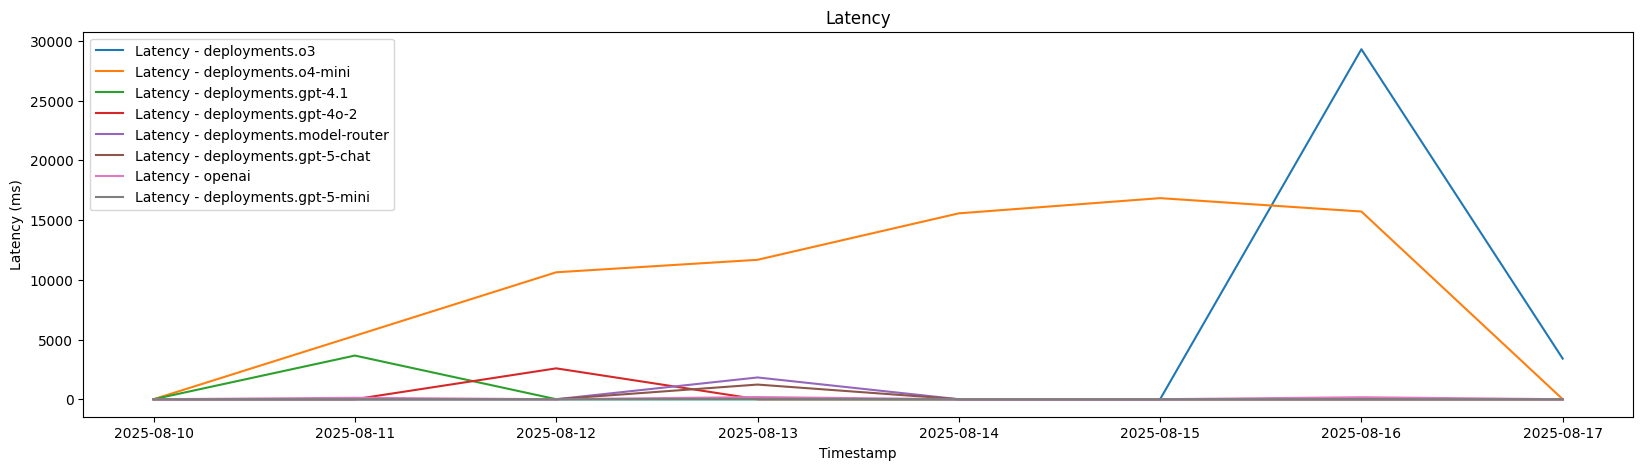

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))

for metric in latency_metrics or []:
    metric_name = extract_metric_name(metric)
    for time_series_element in getattr(metric, "timeseries", []) or []:
        points = list(getattr(time_series_element, "data", []) or [])
        if not points:
            continue
        x = [extract_timestamp(p) for p in points]
        y = [getattr(p, "average", None) or 0 for p in points]
        label_meta = metadata_values_to_dict(time_series_element.metadatavalues)
        label = f"{metric_name} - {label_meta.get('ratelimitkey', 'All Deployments')}"
        ax.plot(x, y, label=label)

ax.set_xlabel("Timestamp")
ax.set_ylabel("Latency (ms)")
ax.set_title("Latency")
ax.legend()
plt.show()


In [44]:
response = client.metrics.list(
    resource_id,
    metricnames="ProcessedPromptTokens",
    timespan=timespan,
    interval=daily_interval,
    filter="FeatureName eq '*'",
)

prompt_token_metrics = response.value


In [47]:
for metric in prompt_token_metrics or []:
    metric_name = extract_metric_name(metric)
    print(metric_name)
    for time_series_element in getattr(metric, "timeseries", []) or []:
        metadata = metadata_values_to_dict(time_series_element.metadatavalues)
        print(metadata)
        for metric_value in getattr(time_series_element, "data", []) or []:
            payload = metric_value.as_dict() if hasattr(metric_value, "as_dict") else metric_value.__dict__
            print(payload)


ProcessedPromptTokens
{'featurename': 'o3'}
{'time_stamp': '2025-08-10T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-11T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-12T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-13T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-14T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-15T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-16T00:00:00.000Z', 'total': 486352.0}
{'time_stamp': '2025-08-17T00:00:00.000Z', 'total': 11713153.0}
{'featurename': 'o4-mini'}
{'time_stamp': '2025-08-10T00:00:00.000Z', 'total': 0.0}
{'time_stamp': '2025-08-11T00:00:00.000Z', 'total': 98712.0}
{'time_stamp': '2025-08-12T00:00:00.000Z', 'total': 751730.0}
{'time_stamp': '2025-08-13T00:00:00.000Z', 'total': 445266.0}
{'time_stamp': '2025-08-14T00:00:00.000Z', 'total': 144325.0}
{'time_stamp': '2025-08-15T00:00:00.000Z', 'total': 3767976.0}
{'time_stamp': '2025-08-16T00:00:00.000Z', 'total': 4106350.0}
{'time_stamp': '2025-08-17T00:0

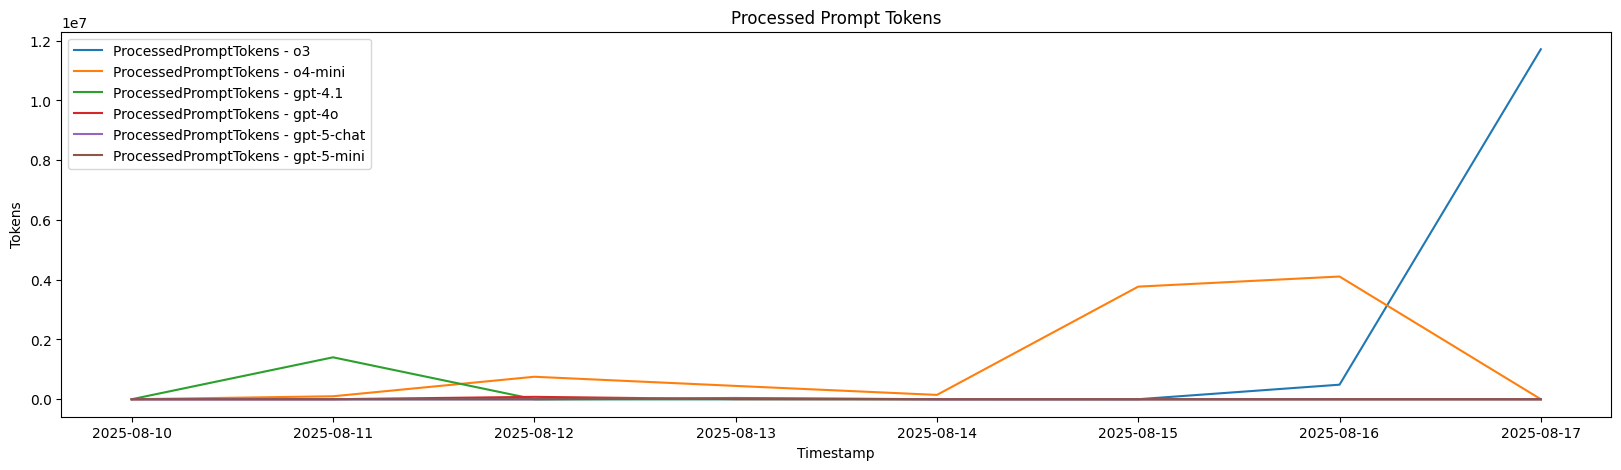

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))

for metric in prompt_token_metrics or []:
    metric_name = extract_metric_name(metric)
    for time_series_element in getattr(metric, "timeseries", []) or []:
        points = list(getattr(time_series_element, "data", []) or [])
        if not points:
            continue
        x = [extract_timestamp(p) for p in points]
        y = [getattr(p, "total", None) or 0 for p in points]
        label_meta = metadata_values_to_dict(time_series_element.metadatavalues)
        label = f"{metric_name} - {label_meta.get('featurename', 'All Deployments')}"
        ax.plot(x, y, label=label)

ax.set_xlabel("Timestamp")
ax.set_ylabel("Tokens")
ax.set_title("Processed Prompt Tokens")
ax.legend()
plt.show()


## Additional Azure OpenAI Metrics Examples

Below are examples of querying other important Azure OpenAI metrics:

In [50]:
response = client.metrics.list(
    resource_id,
    metricnames="AzureOpenAIRequests",
    timespan=timespan,
    interval=hourly_interval,
    filter="ModelDeploymentName eq '*'",
)

request_metrics = response.value

for metric in request_metrics or []:
    metric_name = extract_metric_name(metric)
    print(f"Metric: {metric_name}")
    for time_series_element in getattr(metric, "timeseries", []) or []:
        metadata = metadata_values_to_dict(time_series_element.metadatavalues)
        print(f"Dimensions: {metadata}")
        for metric_value in getattr(time_series_element, "data", []) or []:
            total_value = getattr(metric_value, "total", None)
            if total_value is not None:
                print(f"  {extract_timestamp(metric_value)}: {total_value} requests")


Metric: AzureOpenAIRequests
Dimensions: {'modeldeploymentname': 'o4-mini'}
  2025-08-10 00:00:00+00:00: 0.0 requests
  2025-08-10 01:00:00+00:00: 0.0 requests
  2025-08-10 02:00:00+00:00: 0.0 requests
  2025-08-10 03:00:00+00:00: 0.0 requests
  2025-08-10 04:00:00+00:00: 0.0 requests
  2025-08-10 05:00:00+00:00: 0.0 requests
  2025-08-10 06:00:00+00:00: 0.0 requests
  2025-08-10 07:00:00+00:00: 0.0 requests
  2025-08-10 08:00:00+00:00: 0.0 requests
  2025-08-10 09:00:00+00:00: 0.0 requests
  2025-08-10 10:00:00+00:00: 0.0 requests
  2025-08-10 11:00:00+00:00: 0.0 requests
  2025-08-10 12:00:00+00:00: 0.0 requests
  2025-08-10 13:00:00+00:00: 0.0 requests
  2025-08-10 14:00:00+00:00: 0.0 requests
  2025-08-10 15:00:00+00:00: 0.0 requests
  2025-08-10 16:00:00+00:00: 0.0 requests
  2025-08-10 17:00:00+00:00: 0.0 requests
  2025-08-10 18:00:00+00:00: 0.0 requests
  2025-08-10 19:00:00+00:00: 0.0 requests
  2025-08-10 20:00:00+00:00: 0.0 requests
  2025-08-10 21:00:00+00:00: 0.0 requests
 

In [51]:
response = client.metrics.list(
    resource_id,
    metricnames="ActiveTokens",
    timespan=timespan,
    interval=hourly_interval,
    filter="ModelDeploymentName eq '*'",
)

active_token_metrics = response.value

for metric in active_token_metrics or []:
    metric_name = extract_metric_name(metric)
    print(f"Metric: {metric_name}")
    for time_series_element in getattr(metric, "timeseries", []) or []:
        metadata = metadata_values_to_dict(time_series_element.metadatavalues)
        print(f"Dimensions: {metadata}")
        for metric_value in getattr(time_series_element, "data", []) or []:
            total_value = getattr(metric_value, "total", None)
            if total_value is not None:
                print(f"  {extract_timestamp(metric_value)}: {total_value} active tokens")


Metric: ActiveTokens


In [52]:
response = client.metrics.list(
    resource_id,
    metricnames="AzureOpenAIProvisionedManagedUtilizationV2",
    timespan=timespan,
    interval=hourly_interval,
    filter="ModelDeploymentName eq '*'",
)

utilization_metrics = response.value

for metric in utilization_metrics or []:
    metric_name = extract_metric_name(metric)
    print(f"Metric: {metric_name}")
    for time_series_element in getattr(metric, "timeseries", []) or []:
        metadata = metadata_values_to_dict(time_series_element.metadatavalues)
        print(f"Dimensions: {metadata}")
        for metric_value in getattr(time_series_element, "data", []) or []:
            average_value = getattr(metric_value, "average", None)
            if average_value is not None:
                print(f"  {extract_timestamp(metric_value)}: {average_value:.2f}% utilization")


Metric: AzureOpenAIProvisionedManagedUtilizationV2


In [28]:
response = client.metrics.list(
    resource_id,
    metricnames="RAIRejectedRequests",
    timespan=timespan,
    interval=hourly_interval,
    filter="ModelDeploymentName eq '*'",
)

content_safety_metrics = response.value

print("Blocked Volume (Content Safety):")
for metric in content_safety_metrics or []:
    metric_name = extract_metric_name(metric)
    print(f"Metric: {metric_name}")
    for time_series_element in getattr(metric, "timeseries", []) or []:
        metadata = metadata_values_to_dict(time_series_element.metadata_values)
        print(f"Dimensions: {metadata}")
        for metric_value in getattr(time_series_element, "data", []) or []:
            total_value = getattr(metric_value, "total", None)
            if total_value is not None:
                print(f"  {extract_timestamp(metric_value)}: {total_value} blocked requests")


Datetime with no tzinfo will be considered UTC.


Blocked Volume (Content Safety):
Metric: RAIRejectedRequests


In [53]:
response = client.metrics.list(
    resource_id,
    metricnames="AzureOpenAITimeToResponse",
    timespan=timespan,
    interval=hourly_interval,
    filter="ModelDeploymentName eq '*'",
)

time_to_response_metrics = response.value

print("Time to Response (Latency):")
for metric in time_to_response_metrics or []:
    metric_name = extract_metric_name(metric)
    print(f"Metric: {metric_name}")
    for time_series_element in getattr(metric, "timeseries", []) or []:
        metadata = metadata_values_to_dict(time_series_element.metadatavalues)
        print(f"Dimensions: {metadata}")
        for metric_value in getattr(time_series_element, "data", []) or []:
            average_value = getattr(metric_value, "average", None)
            if average_value is not None:
                print(f"  {extract_timestamp(metric_value)}: {average_value:.2f}ms average response time")


Time to Response (Latency):
Metric: AzureOpenAITimeToResponse
Dimensions: {'modeldeploymentname': 'o4-mini'}
  2025-08-10 00:00:00+00:00: 0.00ms average response time
  2025-08-10 01:00:00+00:00: 0.00ms average response time
  2025-08-10 02:00:00+00:00: 0.00ms average response time
  2025-08-10 03:00:00+00:00: 0.00ms average response time
  2025-08-10 04:00:00+00:00: 0.00ms average response time
  2025-08-10 05:00:00+00:00: 0.00ms average response time
  2025-08-10 06:00:00+00:00: 0.00ms average response time
  2025-08-10 07:00:00+00:00: 0.00ms average response time
  2025-08-10 08:00:00+00:00: 0.00ms average response time
  2025-08-10 09:00:00+00:00: 0.00ms average response time
  2025-08-10 10:00:00+00:00: 0.00ms average response time
  2025-08-10 11:00:00+00:00: 0.00ms average response time
  2025-08-10 12:00:00+00:00: 0.00ms average response time
  2025-08-10 13:00:00+00:00: 0.00ms average response time
  2025-08-10 14:00:00+00:00: 0.00ms average response time
  2025-08-10 15:00:00

In [56]:
response = client.metrics.list(
    resource_id,
    metricnames="AzureOpenAIRequests,GeneratedTokens,ProcessedPromptTokens,AzureOpenAITimeToResponse",
    timespan=timespan,
    interval=hourly_interval,
    filter="ModelDeploymentName eq '*'",
)

multiple_metrics = response.value

print("Multiple Metrics Summary:")
for metric in multiple_metrics or []:
    metric_name = extract_metric_name(metric)
    print(f"--- {metric_name} ---")
    for time_series_element in getattr(metric, "timeseries", []) or []:
        metadata = metadata_values_to_dict(time_series_element.metadatavalues)
        print(f"Dimensions: {metadata}")
        total_value = 0
        count = 0
        for metric_value in getattr(time_series_element, "data", []) or []:
            value_total = getattr(metric_value, "total", None)
            value_average = getattr(metric_value, "average", None)
            if value_total is not None:
                total_value += value_total
                count += 1
            elif value_average is not None:
                total_value += value_average
                count += 1
        if count > 0:
            avg_value = total_value / count
            print(f"  Average: {avg_value:.2f}")
            print(f"  Data Points: {count}")


Multiple Metrics Summary:
--- AzureOpenAIRequests ---
Dimensions: {'modeldeploymentname': 'o4-mini'}
  Average: 0.55
  Data Points: 192
Dimensions: {'modeldeploymentname': 'o3'}
  Average: 0.26
  Data Points: 192
--- GeneratedTokens ---
Dimensions: {'modeldeploymentname': 'o4-mini'}
  Average: 3074.30
  Data Points: 192
Dimensions: {'modeldeploymentname': 'o3'}
  Average: 545.05
  Data Points: 192
Dimensions: {'modeldeploymentname': 'gpt-4.1'}
  Average: 261.41
  Data Points: 192
Dimensions: {'modeldeploymentname': 'gpt-5-chat'}
  Average: 228.61
  Data Points: 192
Dimensions: {'modeldeploymentname': 'model-router'}
  Average: 117.19
  Data Points: 192
Dimensions: {'modeldeploymentname': 'gpt-4o-2'}
  Average: 15.63
  Data Points: 192
--- ProcessedPromptTokens ---
Dimensions: {'modeldeploymentname': 'o3'}
  Average: 63539.09
  Data Points: 192
Dimensions: {'modeldeploymentname': 'o4-mini'}
  Average: 48512.29
  Data Points: 192
Dimensions: {'modeldeploymentname': 'gpt-4.1'}
  Average: 

## Important Notes and Best Practices

### ⚠️ Deprecated Metrics
- **Avoid using legacy Cognitive Services metrics** like `TotalCalls`, `Latency`, `SuccessfulCalls` for Azure OpenAI
- **Use `AzureOpenAIProvisionedManagedUtilizationV2`** instead of the deprecated `AzureOpenAIProvisionedManagedUtilization`

### 🎯 Recommended Metrics by Use Case

**For Monitoring Request Volume:**
- `AzureOpenAIRequests` (recommended over `TotalCalls`)

**For Monitoring Token Usage:**
- `ProcessedPromptTokens` - Input tokens
- `GeneratedTokens` - Output tokens  
- `TokenTransaction` - Total tokens (input + output)
- `ActiveTokens` - For PTU deployments

**For Monitoring Latency:**
- `AzureOpenAITimeToResponse` - Primary latency metric
- `AzureOpenAITTLTInMS` - Time to last byte
- `AzureOpenAINormalizedTTFTInMS` - Time to first byte

**For Monitoring PTU Utilization:**
- `AzureOpenAIProvisionedManagedUtilizationV2` - Current recommended metric

**For Monitoring Content Safety:**
- `RAIRejectedRequests` - Blocked requests
- `RAIHarmfulRequests` - Harmful content detected
- `RAITotalRequests` - Total requests processed

### 📊 Key Dimensions for Filtering
- **ModelDeploymentName** - Essential for multi-model deployments
- **ModelName** - Filter by specific models (gpt-4, gpt-35-turbo, etc.)
- **StatusCode** - Filter by success/error status
- **StreamType** - Streaming vs non-streaming requests
- **Region** - For multi-region deployments

### 🔍 Granularity Recommendations
- **Real-time monitoring**: PT1M (1 minute)
- **Hourly analysis**: PT1H (1 hour) 
- **Daily trends**: P1D (1 day)

### 📅 Metric Retention
- Metrics are retained according to Azure Monitor retention policies
- Plan your historical analysis accordingly